# Day 10

In [26]:
import re

def getCoord(filename):
    f = open(filename)
    values = re.compile(r'[-]?\d+')
    coord = []
    for l in f.readlines():
        v = [int(d) for d in re.findall(values,l)]
        #print(l.strip("\n"),v)
        coord.append([ v[:2],v[2:] ])
    return coord

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def GridSizes(coord):
    X = []
    Y = []
    for c in coord:
        x,y = c[0]
        X.append(x)
        Y.append(y)
    xmin = min(X)
    xmax = max(X)
    ymin = min(Y)
    ymax = max(Y)
    return xmin,xmax,ymin,ymax

def CoordToGrid(coord,xmin,xmax,ymin,ymax):
    grid = np.zeros((ymax-ymin+1,xmax-xmin+1))
    for c in coord:
        x,y = c[0]
        grid[y-ymin][x-xmin] = 1
    return grid

def EvolveCoord(coord):
    for i in range(len(coord)):
        x,y = coord[i][0]
        vx,vy = coord[i][1]
        coord[i][0] = [x+vx,y+vy]
    return coord

Seconds needed for message to appear = 10081


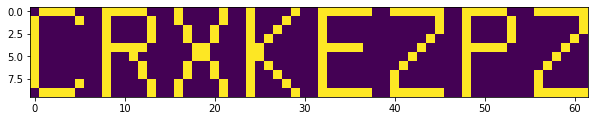

In [28]:
from copy import deepcopy

#coord = getCoord("data/day10test0.txt")
coord = getCoord("data/input10.txt")

xmin,xmax,ymin,ymax = GridSizes(coord)
sizes = [ (xmax-xmin+1)*(ymax-ymin+1) ]

t = 0
while True:    
    coord0 = deepcopy(coord) # save a copy of previous state
    coord = EvolveCoord(coord)
    xmin,xmax,ymin,ymax = GridSizes(coord)
    sizes.append( (xmax-xmin+1)*(ymax-ymin+1) )    
    if len(sizes)>=2: # image has appeared when panel size starts growing again
        if sizes[-2]-sizes[-1] < 0:
            break
    t+=1

print("Seconds needed for message to appear =",t)

xmin,xmax,ymin,ymax = GridSizes(coord0)
grid = CoordToGrid(coord0,xmin,xmax,ymin,ymax)
plt.figure(figsize=(10,10))
plt.imshow(grid)